# Downloads intro

This notebook demonstrates how to download an image from a
remote URL hosted
at the National Archives Catalog.  These images are
collections of scanned pages
from historic ship logs; see
https://catalog.archives.gov/id/23709729 for an
example.

### Import libraries

In [8]:
import os
import requests
from pathlib import Path

### Define URL parameters

In [9]:
base_url = 'https://catalog.archives.gov/'
nara_id = '23709293'
digital_directory = 'Aivik-1943-01'
record_group = 'rg-026'
num_images = 38

### Download a single image

In [10]:
# Sample image URL:
# https://catalog.archives.gov/OpaAPI/media/23709293/content/dc-metro/rg-026/587169/0002/Aivik-1943-01/Aivik-1943-01_0004.JPG

img = "{0}_0001.JPG".format(digital_directory)

url = "{0}OpaAPI/media/{1}/content/dc-metro/{2}/587169/0002/{3}/{4}".format(base_url, nara_id, record_group, digital_directory, img)
r = requests.get(url)

In [11]:
r.status_code

200

In [18]:
# Local path to store image.  We will (eventually) store these on the GLADE filesystem in the parent directory /glade/collections/rda/work/image_archive.
path = os.path.join(os.getcwd(), digital_directory)
# Create directory if needed
p = Path(path)
if (p.exists() == False and p.is_dir() == False):
    os.mkdir(path)

local_filename = "{0}/{1}_0001.jpg".format(path, digital_directory)

if r.status_code == 200:
    with open(local_filename, 'wb') as f:
        f.write(r.content)

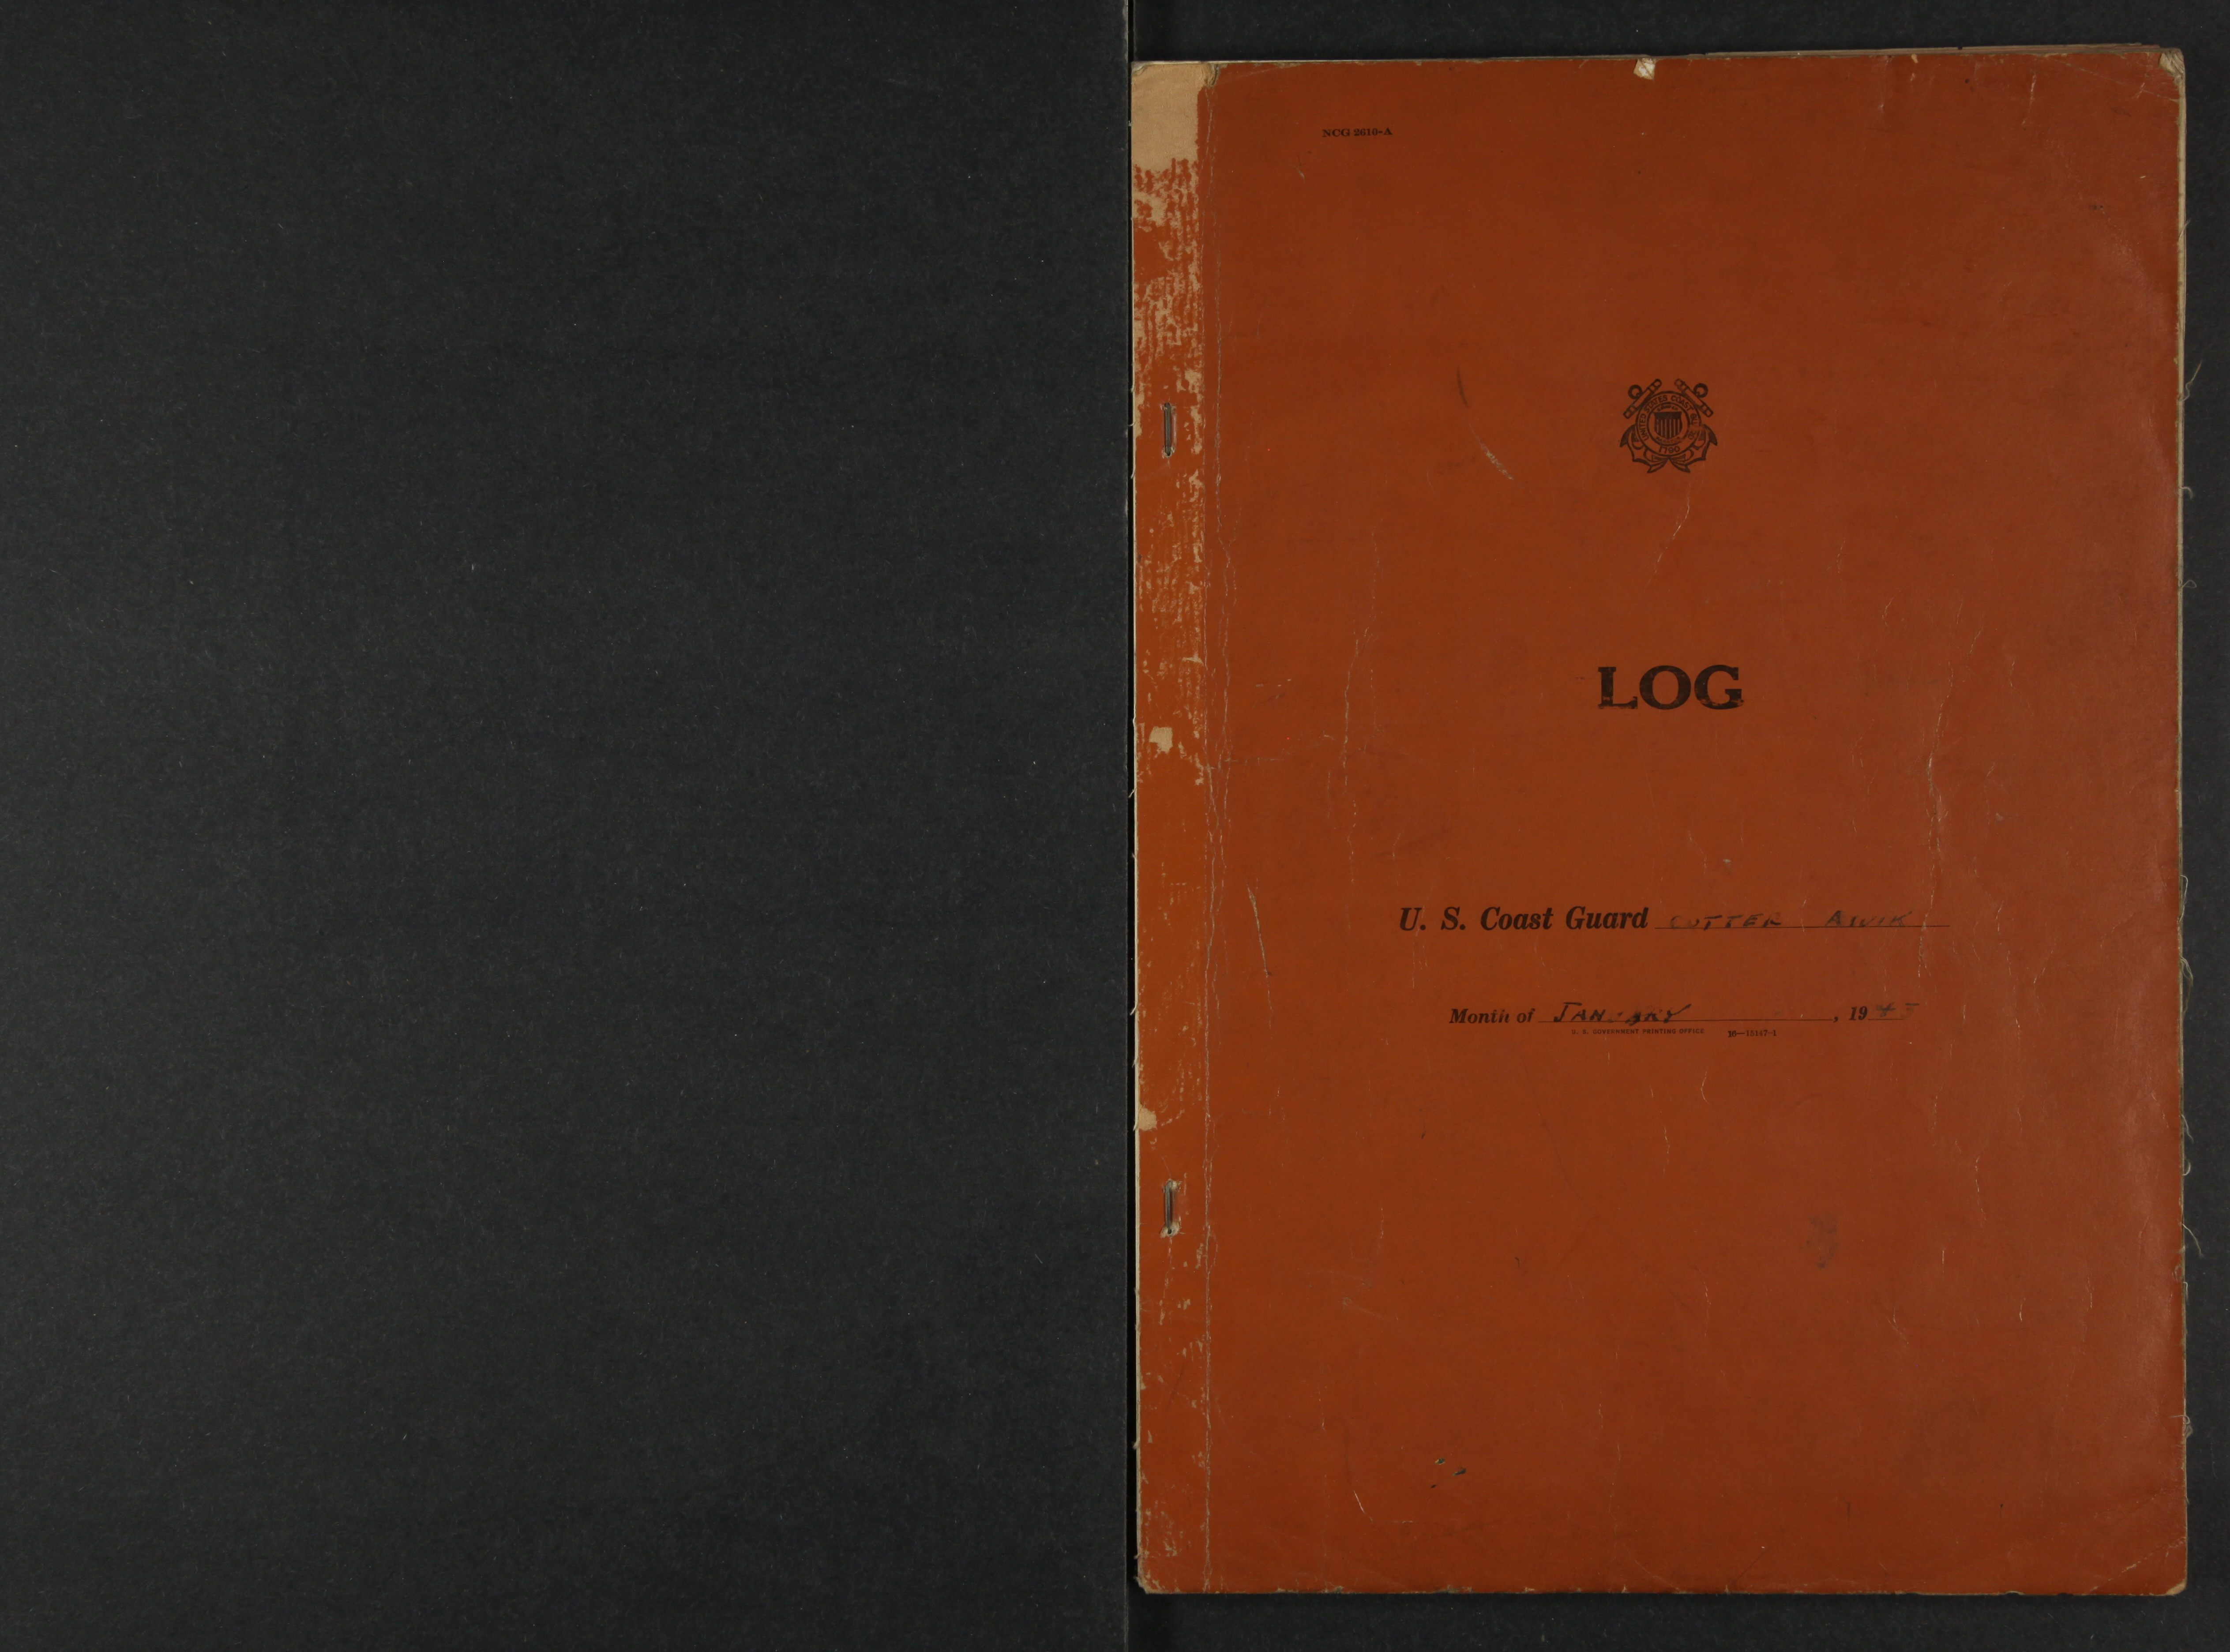

In [19]:
from IPython.display import Image
Image(local_filename)